In [1]:
import warnings
warnings.filterwarnings('ignore')

# Data Science 180



![Alt text](http://thegeektown.com/wp-content/uploads/2015/03/data-scientist.jpg)




An adventure through 15 dimensions of data wrangling, visualization and modeling at mind-bending speeds.


## In a world with too much data sitting around and not enough insight, to whom will we turn for help?

![Alt](http://vignette4.wikia.nocookie.net/matrix/images/8/88/Neo_stops_bullets_2.JPG/revision/latest?cb=20060831032053)

##YOU!    (Neo was busy...)


### You must learn how to wrangle data in the next few hours in order to save the education system. If you fail, we're all doomed...

### You have been given a dataset of test results and metadata, along with a laptop computer. 









#Good luck, everything depends on you.

 

In [2]:
import pandas as pd
exam_data = pd.read_csv('data/PISA2009_Scored_Tests_MEX.csv')
bio_data = pd.read_csv('data/PISA2009_Questionnaire_MEX.csv')

#Meet the data
- 2009 OECD Programme for International Student Assessment
- This presentation focused on Mexico, most participants
- One file containing results of student test results
- Another file containing questionnaires completed by students

In [3]:
exam_cols = exam_data.columns
exam_data[exam_cols[10:20]].head()

,MATH - P2000 Population Pyramids (Q02),MATH - P2000 Population Pyramids (Q03),MATH - P2000 Population Pyramids (Q04),MATH - P2000 Containers (Q01),MATH - P2000 Pipelines (Q01),MATH - P2003 Running Tracks (Q01),MATH - P2003 Running Tracks (Q02),MATH - P2003 Lotteries (Q01),MATH - P2003 Diving (Q01),MATH - P2003 Diving (Q02)
0,NaN,NaN,NaN,Score 0,Score 0,Score 1,Score 0,Score 0,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,Score 1,NaN,NaN,Score 1,NaN,NaN
3,Score 1,Score 0,Score 0,NaN,NaN,NaN,NaN,NaN,Score 0,Score 0
4,NaN,NaN,NaN,NaN,Score 0,NaN,NaN,Score 0,NaN,NaN


In [4]:
bio_cols = bio_data.columns
bio_data[bio_cols[10:20]].head()

,Sex,Attend <ISCED 0>,Age at <ISCED 1>,Repeat <ISCED 1>,Repeat <ISCED 2>,Repeat <ISCED 3>,At Home - Mother,At Home - Father,At Home - Brothers,At Home - Sisters
0,Female,"Yes, more than one year",6,"Yes, once",NaN,NaN,Yes,Yes,Yes,Yes
1,Female,No,6,"Yes, twice or more","No, never",NaN,Yes,Yes,NaN,NaN
2,Female,"Yes, more than one year",6,"Yes, twice or more","No, never","No, never",Yes,Yes,Yes,No
3,Female,"Yes, more than one year",7,"Yes, once",NaN,NaN,Yes,No,Yes,No
4,Female,No,NaN,NaN,"Yes, twice or more",NaN,NaN,NaN,NaN,NaN


###Where do we begin? 


###You know Python right? It does data stuff, right? OK, let's get started then.

###First thing to figure out is how to get the data files on your machine into Python in the first place.


###You've heard of this library called Pandas from another Agent -- it once saved them in a pinch. Lacking any better ideas, let's open up an editor and see if we can't at least cross the starting line.

#Reading data from disk

In [5]:
import pandas as pd
exam_data = pd.read_csv('data/PISA2009_Scored_Tests_MEX.csv')
bio_data = pd.read_csv('data/PISA2009_Questionnaire_MEX.csv')

###What did that just do? 



We called "read_csv", which presumably reads CSV files... and does what with them? 

##pd.read_csv does a magical thing 


It reads a CSV file into a DataFrame. 

DataFrames are mystical creatures in Data Science. 

Popularized by R, they provide a standardized MATRIX-style format for interacting with your data. Most data can fit into this row and column format: financial transactions, iPhone app user records, medical histories, etc.

(And you thought the Matrix references were just for fun)

![Alt](http://www.bigdataexaminer.com/wp-content/uploads/2014/12/screen-1.png)

##Since you were wondering

##Pandas has support for many formats

CSV, Text (tab separated, pipe separated, etc.), Excel, JSON, HTML, SQL, Stuff copied to your clipboard, HDF5...

## Hold up. What's really going on with these DataFrames?

## Two data structures: Series and DataFrame

###Series
Think of this as one column of your data - one data type.

### DataFrame
All of the columns in your data. Mixed data types. 



#Many Series can be combined and represented as a DataFrame object.

#A DataFrame can be represented as many Series objects. 




#Pandas provides tons of functions to:

###slice, dice, merge, join, group by, select, append, find, transform, sort, reverse, pivot and anything else you want to do




#... for both Series and DataFrames. 

Most functions are designed to work with either type or even combinations of the two, just like you would intuitively expect:

i.e. A concat function can contatenate arbitrary combinations of 0 to n Series and DataFrames.

#Accessing data in a DataFrame

###Get one column (Series)

In [6]:
exam_data['Student ID 5-digit'].head()

0    1
1    2
2    3
3    4
4    5
Name: Student ID 5-digit, dtype: int64

###Get a subset of columns (DataFrame)

In [7]:
exam_data[['Student ID 5-digit', 'School ID 5-digit']].head()

,Student ID 5-digit,School ID 5-digit
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


###Get a subset of rows using a boolean array

In [8]:
exam_data[exam_data['School ID 5-digit'] == 2].head()

,3-character country code,Country code ISO 3-digit,OECD country,Adjudicated sub-region,School ID 5-digit,Student ID 5-digit,Booklet,MATH - P2000 A View Room (Q01),MATH - P2000 Bricks (Q01),MATH - P2000 Population Pyramids (Q01),...,SCIE - P2006 Development and Disaster (Q04),SCIE - P2006 Airbags (Q01),SCIE - P2006 Airbags (Q02),SCIE - P2006 Airbags (Q03),SCIE - P2006 Cooking Outdoors (Q02),SCIE - P2006 Cooking Outdoors (Q06),SCIE - P2006 Extinction of the Dinosaurs (Q01),SCIE - P2006 Extinction of the Dinosaurs (Q03),SCIE - P2006 Extinction of the Dinosaurs (Q04),Version of cognitive database and date of release
31,Mexico,Mexico,OECD,Mexico,2,32,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P2009_16DEC11
32,Mexico,Mexico,OECD,Mexico,2,33,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P2009_16DEC11
33,Mexico,Mexico,OECD,Mexico,2,34,8,Score 0,Score 0,Score 0,...,Score 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P2009_16DEC11
34,Mexico,Mexico,OECD,Mexico,2,35,8,Score 0,Score 0,Score 0,...,Score 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P2009_16DEC11
35,Mexico,Mexico,OECD,Mexico,2,36,24,NaN,NaN,NaN,...,NaN,Score 1,Score 0,Score 0,Score 0,Score 1,Score 0,Score 0,Score 0,P2009_16DEC11


#So you know a bit about DataFrames?

In [9]:
import pandas as pd
exam_data = pd.read_csv('data/PISA2009_Scored_Tests_MEX.csv')
bio_data = pd.read_csv('data/PISA2009_Questionnaire_MEX.csv')

#Fine. What's next?

#Exploratory Data Analysis. 

What is in those files anyway?

Does it look like test data should? 

Is it completely empty? Full? Lots of missing values and NaNs?

What are in the rows? columns?

Does it have appropriate features? (characteristics common to records belonging to a dataset)

###It's impossible to make good decisions moving forward until we know more

We can just output the entire dataframe to the console, but that doesn't scale beyond a couple hundred rows.

<pre>
In [1]: df = DataFrame(np.random.randn(10, 4))

In [2]: df
Out[2]: 
          0         1         2         3
0  0.469112 -0.282863 -1.509059 -1.135632
1  1.212112 -0.173215  0.119209 -1.044236
2 -0.861849 -2.104569 -0.494929  1.071804
3  0.721555 -0.706771 -1.039575  0.271860
4 -0.424972  0.567020  0.276232 -1.087401
5 -0.673690  0.113648 -1.478427  0.524988
6  0.404705  0.577046 -1.715002 -1.039268
7 -0.370647 -1.157892 -1.344312  0.844885
8  1.075770 -0.109050  1.643563 -1.469388
9  0.357021 -0.674600 -1.776904 -0.968914
</pre>


#Pandas gives us a number of tools: 

<br>
    
    .head(n)
    .info()
    .describe()

In [10]:
exam_data.head(5)

,3-character country code,Country code ISO 3-digit,OECD country,Adjudicated sub-region,School ID 5-digit,Student ID 5-digit,Booklet,MATH - P2000 A View Room (Q01),MATH - P2000 Bricks (Q01),MATH - P2000 Population Pyramids (Q01),...,SCIE - P2006 Development and Disaster (Q04),SCIE - P2006 Airbags (Q01),SCIE - P2006 Airbags (Q02),SCIE - P2006 Airbags (Q03),SCIE - P2006 Cooking Outdoors (Q02),SCIE - P2006 Cooking Outdoors (Q06),SCIE - P2006 Extinction of the Dinosaurs (Q01),SCIE - P2006 Extinction of the Dinosaurs (Q03),SCIE - P2006 Extinction of the Dinosaurs (Q04),Version of cognitive database and date of release
0,Mexico,Mexico,OECD,Mexico,1,1,11,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P2009_16DEC11
1,Mexico,Mexico,OECD,Mexico,1,2,13,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P2009_16DEC11
2,Mexico,Mexico,OECD,Mexico,1,3,23,NaN,NaN,NaN,...,Score 1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P2009_16DEC11
3,Mexico,Mexico,OECD,Mexico,1,4,8,Score 1,Score 0,Score 0,...,Score 0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,P2009_16DEC11
4,Mexico,Mexico,OECD,Mexico,1,5,9,NaN,NaN,NaN,...,NaN,Score 2,Score 0,Score 0,Score 0,Score 1,Score 0,Score 1,Score 0,P2009_16DEC11


In [11]:
exam_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38250 entries, 0 to 38249
Columns: 227 entries, 3-character country code  to  Version of cognitive database and date of release
dtypes: float64(32), int64(2), object(193)
memory usage: 66.5+ MB


In [12]:
exam_data.describe()

,School ID 5-digit,Student ID 5-digit,Booklet,READ - P2009 Household Work Q1,READ - P2009 Household Work Q2,READ - P2009 Household Work Q3,READ - P2009 Household Work Q4,READ - P2009 Rhinoceros - Q1,READ - P2009 Rhinoceros - Q2,READ - P2009 Rhinoceros - Q3,...,READ - P2009 Acne Vulgaris Q4,READ - P2009 Acne Vulgaris Q5,READ - P2009 Acne Vulgaris Q6,READ - P2009 The Plays the Thing Q3,READ - P2009 The Plays the Thing Q4,READ - P2009 The Plays the Thing Q6,READ - P2009 The Plays the Thing Q7,READ - P2009 Telecommuting Q1,READ - P2009 Telecommuting Q4,READ - P2009 Telecommuting Q7
count,38250.000000,38250.000000,38250.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
mean,765.226536,19125.500000,17.801699,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,441.164788,11041.968235,6.979529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,386.000000,9563.250000,11.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,765.000000,19125.500000,21.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1145.000000,28687.750000,24.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1535.000000,38250.000000,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#We have two files, and both of them have a feature named 'Student ID 5-digit'

#Using this unique ID as our guide, we can match the exam scores and biographical data for a single student.

#This task comes up a lot in data wrangling, since different kinds of data will be stored in different data stores. Often one of the first steps is to combine the relevant sections from each repository of the data.

In [13]:
useless = {
    u' Version of cognitive database and date of release',
    u'3-character country code ',
    u'Adjudicated sub-region',
}

not_questions = {u'Booklet', 
                 u'School ID 5-digit', 
                 u'Student ID 5-digit',
                 u'OECD country',
                 u'Country code ISO 3-digit',}

score_mapping = {
    'Score 0': 0,
    'Score 1': 1,
    'Score 2': 2,
    'Not reached': 0,
}

questions = set(exam_data.columns) - not_questions - useless

for question in questions:
    exam_data[question] = exam_data[question].map(score_mapping)

In [14]:
math_qs = {q for q in questions if q.startswith('MATH')}
read_qs = {q for q in questions if q.startswith('READ')}
scie_qs = {q for q in questions if q.startswith('SCIE')}
    
totals = exam_data[list(questions)].sum(axis=1)
math_score = exam_data[list(math_qs)].sum(axis=1)
read_score = exam_data[list(read_qs)].sum(axis=1)
scie_score = exam_data[list(scie_qs)].sum(axis=1)

#Let's merge into one DataFrame

In [15]:
score_df = pd.DataFrame({'Total Score': totals, 
                         'Math Score': math_score, 
                         'Reading Score': read_score, 
                         'Science Score': scie_score,
                         'Student ID 5-digit': exam_data['Student ID 5-digit']})

In [16]:
data = pd.merge(score_df, bio_data, on='Student ID 5-digit')


#Get summary info for any column

In [17]:
data['Reading Enjoyment Time'].value_counts()

30 minutes or less a day      16997
I don�t read for enjoyment     9071
Between 30 and 60 minutes      7047
1 to 2 hours a day             3772
More than 2 hours a day        1008
dtype: int64

#Particularly important for later

Looking for Missing Values

In [18]:
data.isnull().sum()

Math Score                                         11844
Reading Score                                         44
Science Score                                      11876
Student ID 5-digit                                     0
Total Score                                           44
Country code 3-character                               0
Country code ISO 3-digit                               0
OECD country                                           0
Adjudicated sub-region                                 0
School ID 5-digit                                      0
Grade                                                 37
<Programme>                                           37
Birth Month                                            0
Birth Year                                             0
Sex                                                    0
Attend <ISCED 0>                                     495
Age at <ISCED 1>                                    1119
Repeat <ISCED 1>               

#What about relationships between variables?

##Should we compute covariance?


#Nah, let's make some plots!


#A quick aside.
##IPython Notebooks (like this one) are great.
##Plots in your notebook!

In [19]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Two plotting weapons

###Matplotlib

- The historical go-to for plotting
- allows lots of fine-grained control
- built with numpy in mind (Numpy and its cousin Scipy are the number-crunching go-to's in Python)

###Seaborn

- Expressive power
- built with pandas in mind
- trendy newcomer, but gaining a loyal following

We will mainly use seaborn examples in this presentation. It's very intuitive and powerful to use.

In [20]:
import seaborn as sns

#Scatterplots

View relationship between two continuous variables

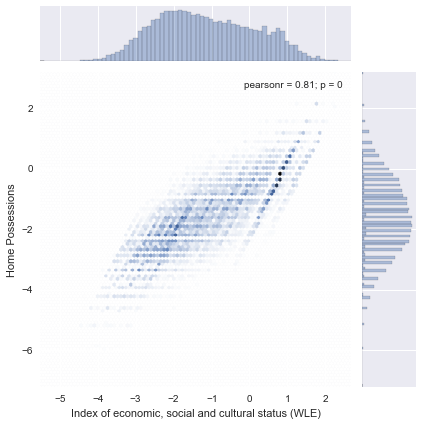

In [21]:
sns.jointplot(data['Index of economic, social and cultural status (WLE)'], 
              data['Home Possessions'], kind="hex")

In this dataset, several variables can stand as proxies for socio-economic status

# Histogram


##Much better than simple averages

In [22]:
data.groupby('Sex')['Total Score'].mean()

Sex
Female    26.011838
Male      25.708237
Name: Total Score, dtype: float64

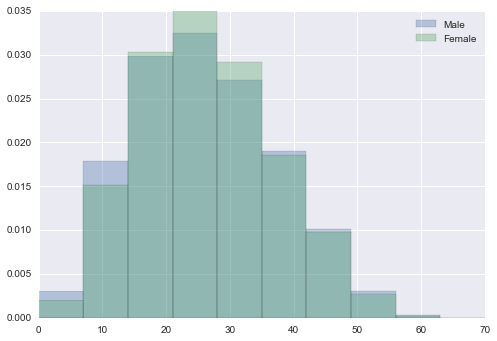

In [23]:
groups = data.groupby('Sex').groups
for key, row_ids in groups.iteritems():
    pylab.hist(data['Total Score'][row_ids].values,
               normed=True,
               bins=np.linspace(0, 70, 11),
               alpha=0.35,
               label=str(key))
pylab.legend()

###Doesn't work as well for more than two levels

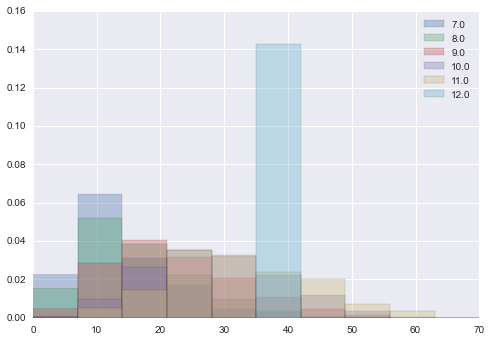

In [24]:
groups = data.groupby('Grade').groups
for key, row_ids in groups.iteritems():
    pylab.hist(data['Total Score'][row_ids].values,
               normed=True,
               bins=np.linspace(0, 70, 11),
               alpha=0.35,
               label=str(key))
pylab.legend()

## Violin Plots work better for comparing several distributions

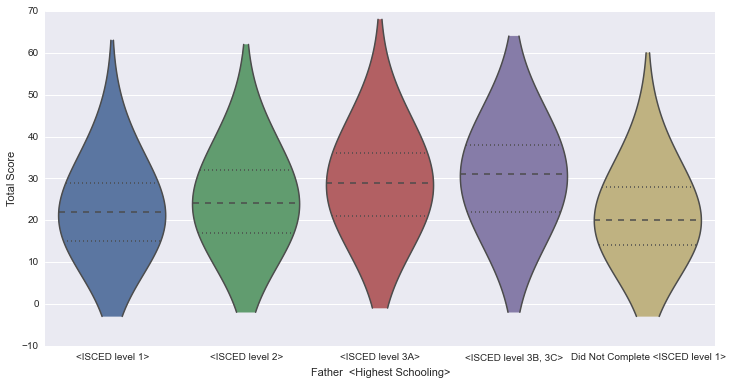

In [25]:
nonnull_subset = data['Total Score'].notnull()
plt.figure(figsize=(12, 6))
sns.violinplot(data['Total Score'][nonnull_subset], 
               data['Father  <Highest Schooling>'][nonnull_subset], 
               inner='box',
               bw=1)

##Alternatively, use `FacetGrid`
###Visualize interactions of variables on response

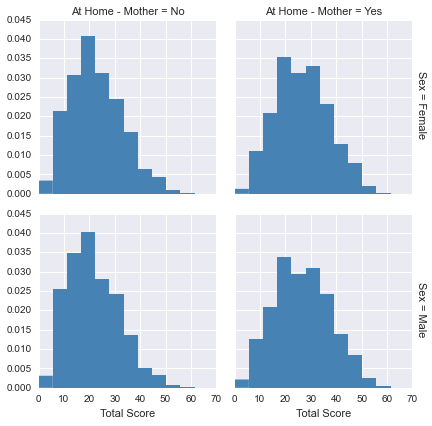

In [26]:
no_nans = data[data['Sex'].notnull() & 
               data['At Home - Mother'].notnull()]

g = sns.FacetGrid(no_nans, row="Sex", col="At Home - Mother", 
                  margin_titles=True, dropna=True)
bins = np.linspace(0, 67, 13)
g.map(plt.hist, "Total Score", color="steelblue", bins=bins, 
      lw=0, normed=True)

###If distribution not required, try factor plot to get a simpler comparison

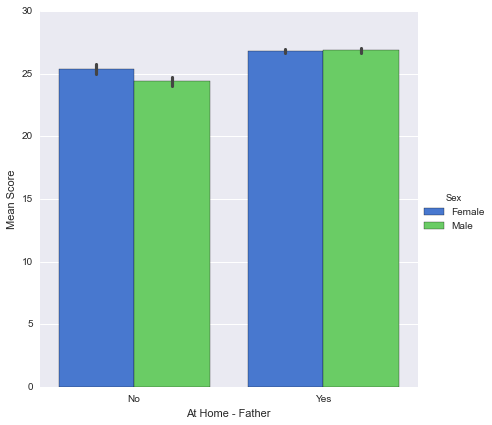

In [27]:
no_nans = data[data['Sex'].notnull() & 
               data['At Home - Father'].notnull()]

g = sns.factorplot("At Home - Father", "Total Score", "Sex",
                    data=no_nans, kind="bar",
                    size=6, palette="muted", dropna=True)
g.set_ylabels("Mean Score")

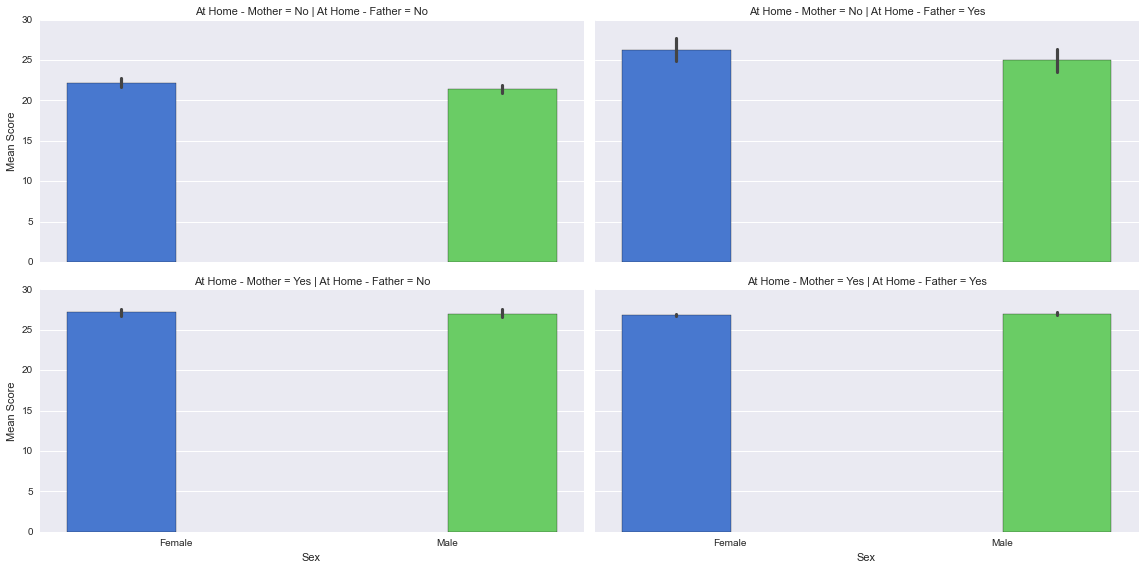

In [81]:
no_nans = data[data['Sex'].notnull() & 
               data['At Home - Father'].notnull() &
               data['At Home - Mother'].notnull()]

g = sns.factorplot("Sex", "Total Score", "Sex",
                   row="At Home - Mother",
                   col="At Home - Father",
                   data=no_nans, kind="bar",
                   palette="muted", size=4, aspect=2,
                   dropna=True)
g.set_ylabels("Mean Score")

#Heatmaps are a visual tool to look at the distribution of observations _across_ settings of two variables (as opposed to _within_ a setting like `FacetGrid`)

Need to use ``pivot_table`` to get data in expected order

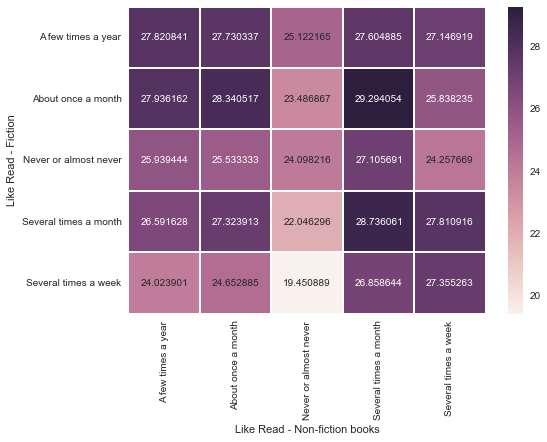

In [29]:
ptable = pd.pivot_table(
    data, 
    values='Total Score', 
    index='Like Read - Fiction', 
    columns='Like Read - Non-fiction books')
sns.heatmap(ptable, annot=True, fmt="f")


###Not very useful if not in order...

###Heatmaps - Round 2
####Effects of variables over a range

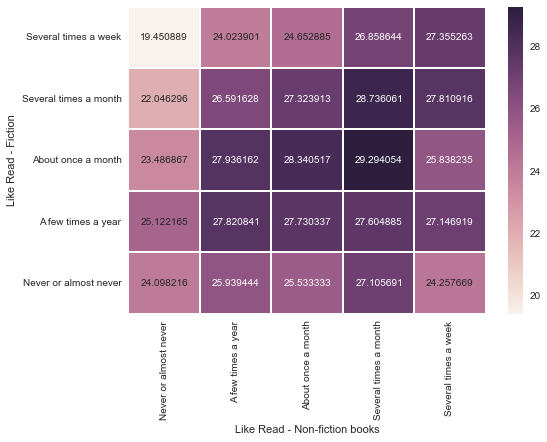

In [30]:
display_order = [
    u'Never or almost never', u'A few times a year', 
    u'About once a month', u'Several times a month', 
    u'Several times a week'
]
display_table = ptable[display_order].reindex(reversed(display_order))
sns.heatmap(display_table, annot=True, fmt="f")

###Pivot tables can do other aggregations

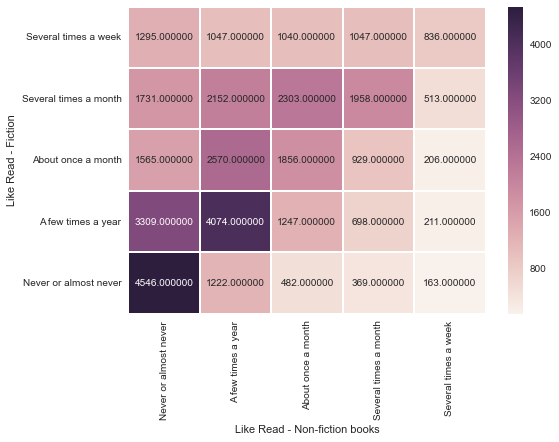

In [31]:
count_table = pd.pivot_table(
    data, values='Total Score', 
    index='Like Read - Fiction', 
    columns='Like Read - Non-fiction books',
    aggfunc=np.count_nonzero)  # <--- Look here

sns.heatmap(count_table[display_order].reindex(reversed(display_order)), annot=True, fmt='f')

#Scatterplot

What is the relationship between X and Y? (If any!)

Positive, Negative, Linear, Non-linear...

Are there clusters of similar observations?


##Looking for any general relationship

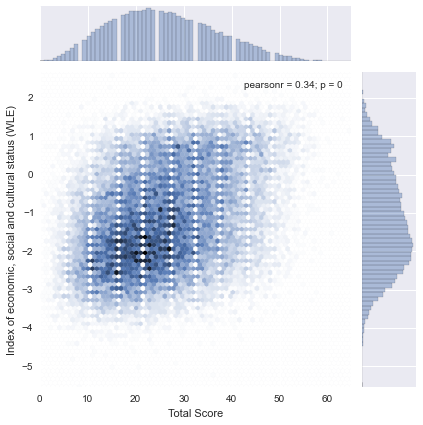

In [32]:
sns.jointplot(
    "Total Score", 
    'Index of economic, social and cultural status (WLE)', 
    data, kind='hex')

#Modeling

## Scikit-Learn

# Widely used machine learning package

- Classification Models
- Regression Models
- Clustering techniques
- Dimensionality Reduction
- Preprocessing
- ...

In [33]:
import sklearn

##Experimental Design

##Build a model that is useful

Can only build model on data that has a known output

Our data has missing values in the target

Today, we'll drop those observations. 

Just as a note, sometimes this isn't a good thing to do (think of a clinical study...)


In [34]:
model_data = data[data['Total Score'].notnull()]
target = model_data.pop('Total Score')

## Avoiding overfitting
- Need to keep data we train on from data we validate on
- Otherwise the results will be overly optimistic
- ... and ultimately, the model will perform poorly on new data

In [35]:
import sklearn.cross_validation

(train_data, 
 test_data, 
 train_target, 
 test_target) = sklearn.cross_validation.train_test_split(
    model_data, target, test_size=0.2, random_state=1337
)

####Today we will use simple train/test split

####Recommend using multiple cross-validation folds

##Variable Preprocessing

###Most statistical models require numeric encoding

###Many will choke on missing values

###Need some massaging before fitting a statistical learner

In [36]:
data['Repeat <ISCED 1>'].value_counts()

No, never             32753
Yes, once              3552
Yes, twice or more      442
dtype: int64

In [37]:
data['Mother  <Highest Schooling>'].value_counts()

<ISCED level 2>                     11400
<ISCED level 3A>                     8369
<ISCED level 1>                      7898
Did not complete <ISCED level 1>     4844
<ISCED level 3B, 3C>                 4631
dtype: int64

In [38]:
import sklearn.preprocessing
import sklearn.feature_extraction

In [39]:
from sklearn.feature_extraction import DictVectorizer
encoder = DictVectorizer(sparse=False)

our_categ_vars = [
    'Repeat <ISCED 1>',
    'Mother  <Highest Schooling>',
    'Possessions Internet',
    'Online - Reading Emails',
    'Sex',
    'Reading Tasks - Memorise text',
]

vardata = train_data[our_categ_vars].fillna('MISSING')
encoder.fit(vardata.to_dict(orient='records'))

train_catdata = encoder.transform(vardata.to_dict(orient='records'))

test_vardata = test_data[our_categ_vars].fillna('MISSING')
test_catdata = encoder.transform(
    test_data[our_categ_vars].to_dict(orient='records'))

##Missing values in numeric columns

###We will impute with the median value


In [40]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')

our_num_vars = [
    'Grade',
    'Home Possessions',
    'Joy/Like Reading',
    'Diversity reading',
    'No of ALL <class period> a week',
    'Reading for School: Traditional literature courses',
    'Min in <class period> for <Maths>'
]

numdata = train_data[our_num_vars]
imputer.fit(numdata)

train_numdata = imputer.transform(numdata)
test_numdata = imputer.transform(test_data[our_num_vars])

### Now, we put our training data back together again

In [41]:
train_this = np.hstack([train_numdata, train_catdata])
test_this = np.hstack([test_numdata, test_catdata])

##Finally, ready to build a model
###Linear Regression is a sensible first choice

In [42]:
import sklearn
from sklearn.linear_model import ElasticNet

lr = ElasticNet(alpha=0)
lr.fit(train_this, train_target)

lr_predictions = pd.Series(lr.predict(test_this),
                           name='Linear Regression')

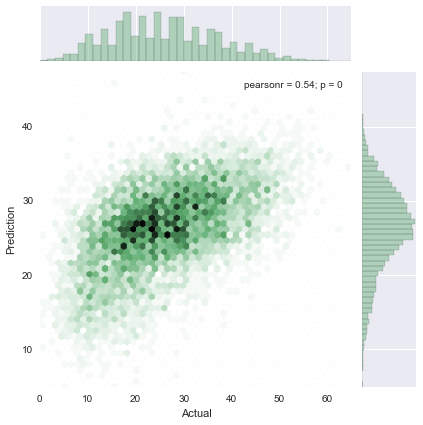

In [43]:
p_df = pd.DataFrame({'Prediction': lr_predictions,
                     'Actual': test_target.values})

pylab.figure(figsize=(10, 10))
sns.jointplot('Actual', 'Prediction', data=p_df, 
              kind="hex", color=sns.color_palette()[1])

##Was our model any good?

In [44]:
from sklearn import metrics

test_metrics = {
    'Explained Variance': metrics.explained_variance_score,
    'MAE': metrics.mean_absolute_error,
    'MSE': metrics.mean_squared_error,
    'MedAE': metrics.median_absolute_error,
    'R2': metrics.r2_score
}

In [45]:
def metrics_report(*predictions):
    records = []
    for prediction_set in predictions:
        record = {'name': prediction_set.name}
        for metric_name in sorted(test_metrics.keys()):
            metric_func = test_metrics[metric_name]
            record[metric_name] = metric_func(test_target, prediction_set)
        records.append(record)
    frame = pd.DataFrame.from_records(records).set_index('name')
    return frame
        
metrics_report(lr_predictions)
    

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Linear Regression,0.292103,7.470887,84.701926,6.497311,0.290354


##These numbers don't really tell you if a model is good
###Not by themselves, at least
###Keep them in mind while we do more modeling

##Now, just for a baseline
###Let's look at the mean and median predictors

In [46]:
mean_response = np.mean(train_target)
mean_predictions = pd.Series(np.ones_like(test_target) * mean_response,
                             name='Mean Response')

median_response = np.median(train_target)
median_predictions = pd.Series(np.ones_like(test_target) * median_response,
                               name='Median Response')

metrics_report(mean_predictions, 
               median_predictions, 
               lr_predictions)

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Mean Response,0.000000,8.946967,119.362053,7.854600,-0.000034
Median Response,0.000000,8.922141,120.201125,8.000000,-0.007064
Linear Regression,0.292103,7.470887,84.701926,6.497311,0.290354


##Ordinary linear regression is boring
### Let's try something more exotic

In [47]:
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import ElasticNet

estimator = ElasticNet()

parameters = {
    'alpha': np.linspace(0.1, 2, 10, endpoint=True),
    'l1_ratio': np.linspace(0, 1, 10, endpoint=True)
}

enet = GridSearchCV(estimator, parameters)
enet.fit(train_this, train_target)

GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=1,
       param_grid={'alpha': array([ 0.1    ,  0.31111,  0.52222,  0.73333,  0.94444,  1.15556,
        1.36667,  1.57778,  1.78889,  2.     ]), 'l1_ratio': array([ 0.     ,  0.11111,  0.22222,  0.33333,  0.44444,  0.55556,
        0.66667,  0.77778,  0.88889,  1.     ])},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

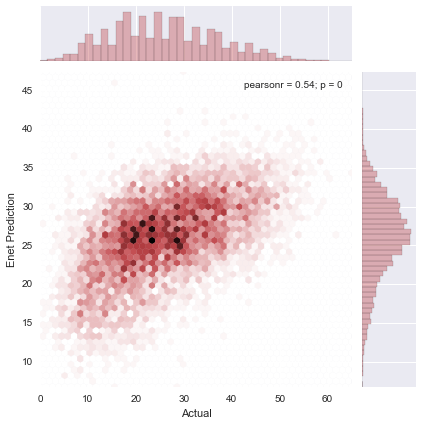

In [48]:
enet_predictions = pd.Series(enet.predict(test_this),
                             name='Elastic Net')
p_df = pd.DataFrame({'Enet Prediction': enet_predictions,
                     'Actual': test_target.values})

pylab.figure(figsize=(10, 10))
sns.jointplot('Actual', 'Enet Prediction', data=p_df, kind="hex",
              color=sns.color_palette()[2])

In [49]:
metrics_report(mean_predictions, median_predictions, lr_predictions, enet_predictions)

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Mean Response,0.000000,8.946967,119.362053,7.854600,-0.000034
Median Response,0.000000,8.922141,120.201125,8.000000,-0.007064
Linear Regression,0.292103,7.470887,84.701926,6.497311,0.290354
Elastic Net,0.289682,7.483740,84.801702,6.518074,0.289518


##Let's do a RandomForest too. 

##Because why not?


In [50]:
from sklearn.ensemble import RandomForestRegressor
estimator = RandomForestRegressor()

parameters = {'n_estimators': (5, 10, 15, 20),
              'min_samples_split': (4, 8, 16),
              'min_samples_leaf': (1, 2, 4),
             }
rfr = GridSearchCV(estimator, parameters, n_jobs=3)
rfr.fit(train_this, train_target)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, loss_func=None, n_jobs=3,
       param_grid={'n_estimators': (5, 10, 15, 20), 'min_samples_split': (4, 8, 16), 'min_samples_leaf': (1, 2, 4)},
       pre_dispatch='2*n_jobs', refit=True, score_func=None, scoring=None,
       verbose=0)

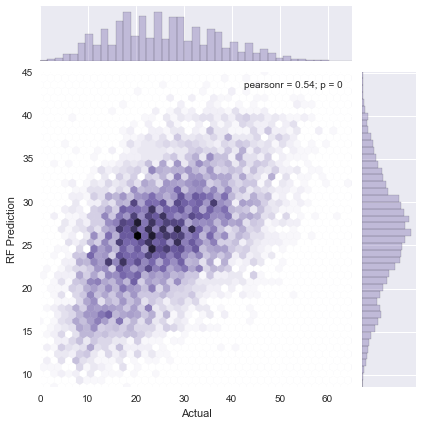

In [51]:
rfr_predictions = pd.Series(rfr.predict(test_this),
                            name='Random Forest')

p_df = pd.DataFrame({'RF Prediction': rfr_predictions,
                     'Actual': test_target.values})

pylab.figure(figsize=(10, 10))
sns.jointplot('Actual', 'RF Prediction', data=p_df, kind="hex",
              color=sns.color_palette()[3])

In [52]:
metrics_report(mean_predictions,
               median_predictions,
               lr_predictions,
               enet_predictions,
               rfr_predictions)

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Mean Response,0.000000,8.946967,119.362053,7.854600,-0.000034
Median Response,0.000000,8.922141,120.201125,8.000000,-0.007064
Linear Regression,0.292103,7.470887,84.701926,6.497311,0.290354
Elastic Net,0.289682,7.483740,84.801702,6.518074,0.289518
Random Forest,0.290917,7.434601,84.680823,6.447632,0.290531


##These models seem very close
###Are they doing anything differently?

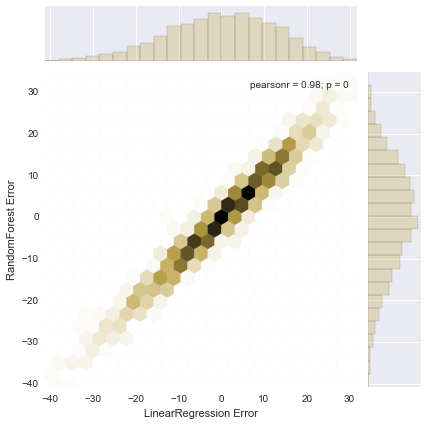

In [53]:
lr_diffs = lr_predictions - test_target
lr_diffs.name = 'LinearRegression Error'
rfr_diffs = rfr_predictions - test_target
rfr_diffs.name = 'RandomForest Error'

sns.jointplot(lr_diffs, rfr_diffs, kind='hex', color=sns.color_palette()[4])

###They are making the same kinds of errors

###Not unexpected

#Feature Engineering (lite)

## Simple transformations
### Quadratic combinations of existing features

In [54]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2

model = make_pipeline(PolynomialFeatures(degree), Lasso())
model.fit(train_this, train_target)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

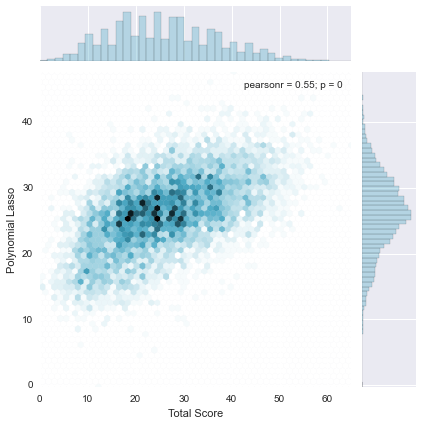

In [55]:
poly_preds = pd.Series(model.predict(test_this),
                       name='Polynomial Lasso',
                       index=test_target.index)


sns.jointplot(test_target, 
              poly_preds,
              kind='hex',
              color=sns.color_palette()[5])    

In [56]:
metrics_report(mean_predictions,
               median_predictions,
               lr_predictions,
               enet_predictions,
               rfr_predictions,
               poly_preds)

,Explained Variance,MAE,MSE,MedAE,R2
name,,,,,
Mean Response,0.000000,8.946967,119.362053,7.854600,-0.000034
Median Response,0.000000,8.922141,120.201125,8.000000,-0.007064
Linear Regression,0.292103,7.470887,84.701926,6.497311,0.290354
Elastic Net,0.289682,7.483740,84.801702,6.518074,0.289518
Random Forest,0.290917,7.434601,84.680823,6.447632,0.290531
Polynomial Lasso,0.303468,7.401725,83.197697,6.474314,0.302957


#What next?

##Try more variables
##Try different transforms
##Try different models

#Wrap up

##Pandas is great for manipulating data
##Matplotlib and Seaborn make sweet visualizations
##Scikit-Learn has great ML tools

#Now you can load the data and explore it too! 

Go to https://github.com/joshloyal/odsc-pisa to clone the code for this talk



<pre>
$ mkvirtualenv odsc
$ git clone https://github.com/joshloyal/odsc-pisa.git
$ cd odsc-pisa
$ mkdir data
$ make
</pre>

#Thanks for coming!
##Enjoy ODSC!



